In [1]:
#a
import pandas as pd
url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
df = pd.read_csv(url, sep=',',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
df = pd.get_dummies(df,columns=["CHAS"]) #to categorical
from sklearn.cross_validation import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
if 'MEDV' in df_train.columns:
    y_train = df_train.pop('MEDV').values.reshape(-1,1)
X_train_scaled = scaler.fit_transform(df_train)
if 'MEDV' in df_test.columns:
    y_test = df_test.pop('MEDV').values.reshape(-1,1)
X_test_scaled = scaler.transform(df_test)

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


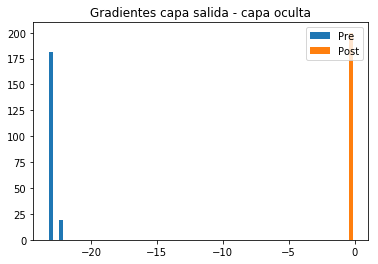

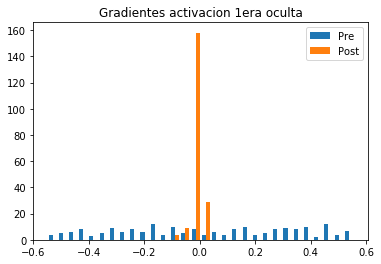

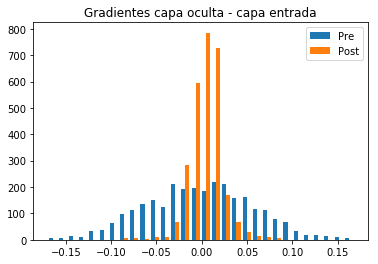

In [6]:
#b
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
###calculate gradients
from keras import backend as K
import tensorflow as tf
import keras
loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
#We can now calculate the gradients.
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_1 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_1 = [gradient/len(y_train) for gradient in evaluated_gradients_1]

model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
evaluated_gradients_2 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_2 = [gradient/len(y_train) for gradient in evaluated_gradients_2]

plt.hist([evaluated_gradients_1[2], evaluated_gradients_2[2]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Gradientes capa salida - capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[1], evaluated_gradients_2[1]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Gradientes activacion 1era oculta')
plt.show()

import itertools
x = list(itertools.chain.from_iterable(evaluated_gradients_1[0]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[0]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Gradientes capa oculta - capa entrada')
plt.show()

b) Explicar pq la distribución del valor de gradientes - efecto de usar sigmoid

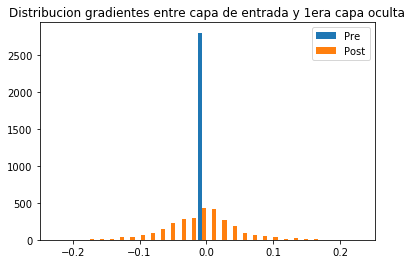

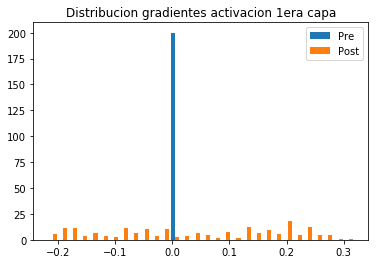

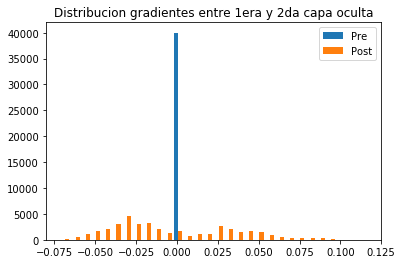

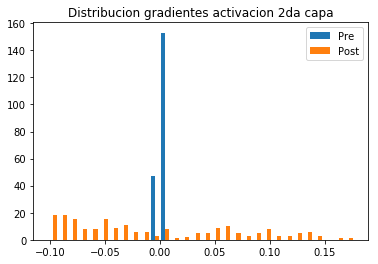

In [22]:
#c
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_1 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_1 = [gradient/len(y_train) for gradient in evaluated_gradients_1]

model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
evaluated_gradients_2 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_2 = [gradient/len(y_train) for gradient in evaluated_gradients_2]

x = list(itertools.chain.from_iterable(evaluated_gradients_1[0]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[0]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre capa de entrada y 1era capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[1], evaluated_gradients_2[1]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 1era capa')
plt.show()

x = list(itertools.chain.from_iterable(evaluated_gradients_1[2]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[2]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre 1era y 2da capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[3], evaluated_gradients_2[3]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 2da capa')
plt.show()

c) De nuevo se ditribuyen cerca cero, por sigmoid y por inicializacion

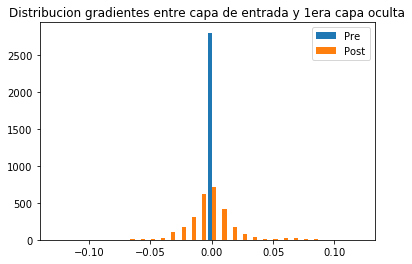

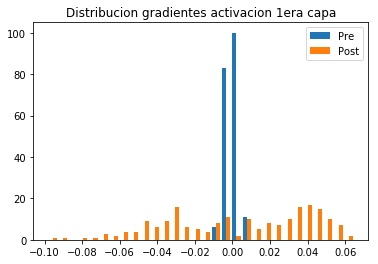

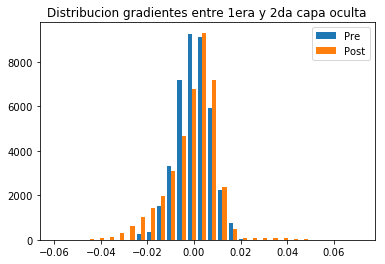

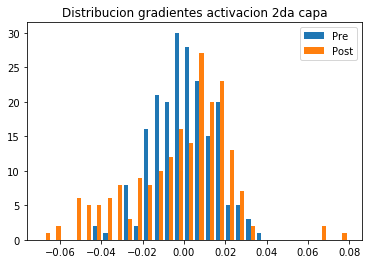

In [23]:
#d
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_1 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_1 = [gradient/len(y_train) for gradient in evaluated_gradients_1]

model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
evaluated_gradients_2 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_2 = [gradient/len(y_train) for gradient in evaluated_gradients_2]

x = list(itertools.chain.from_iterable(evaluated_gradients_1[0]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[0]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre capa de entrada y 1era capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[1], evaluated_gradients_2[1]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 1era capa')
plt.show()

x = list(itertools.chain.from_iterable(evaluated_gradients_1[2]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[2]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre 1era y 2da capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[3], evaluated_gradients_2[3]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 2da capa')
plt.show()

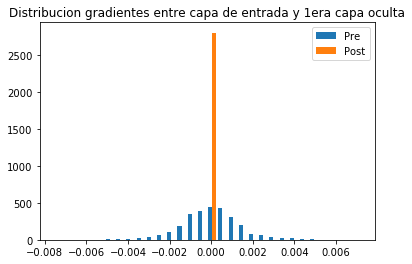

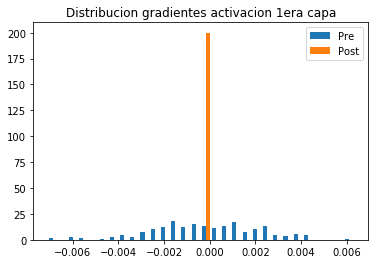

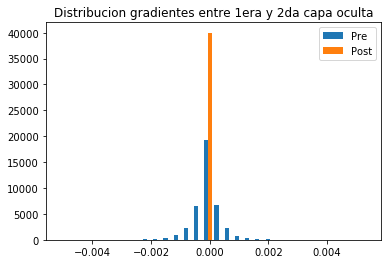

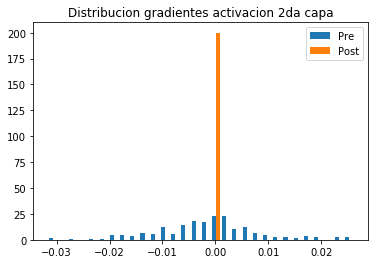

In [24]:
#e
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_1 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_1 = [gradient/len(y_train) for gradient in evaluated_gradients_1]

model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
evaluated_gradients_2 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_2 = [gradient/len(y_train) for gradient in evaluated_gradients_2]

x = list(itertools.chain.from_iterable(evaluated_gradients_1[0]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[0]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre capa de entrada y 1era capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[1], evaluated_gradients_2[1]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 1era capa')
plt.show()

x = list(itertools.chain.from_iterable(evaluated_gradients_1[2]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[2]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre 1era y 2da capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[3], evaluated_gradients_2[3]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 2da capa')
plt.show()

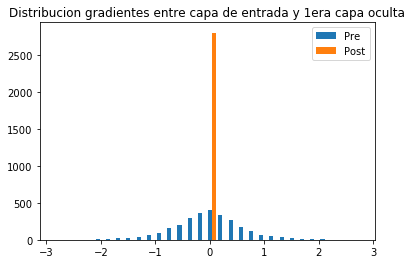

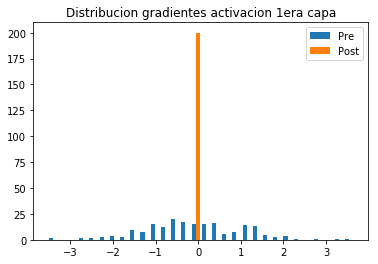

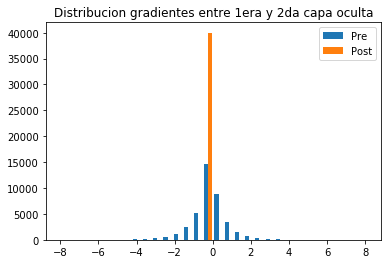

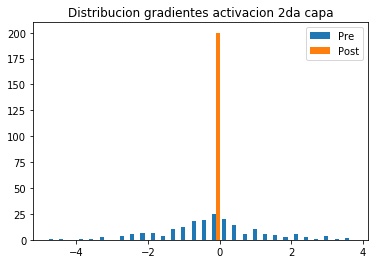

In [26]:
#e2
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

loss = keras.losses.mean_squared_error(model.output,y_train)
listOfVariableTensors = model.trainable_weights
gradients = K.gradients(loss, listOfVariableTensors)
sess = K.get_session()
evaluated_gradients_1 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_1 = [gradient/len(y_train) for gradient in evaluated_gradients_1]

model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
evaluated_gradients_2 = sess.run(gradients,feed_dict={model.input:X_train_scaled})
evaluated_gradients_2 = [gradient/len(y_train) for gradient in evaluated_gradients_2]

x = list(itertools.chain.from_iterable(evaluated_gradients_1[0]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[0]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre capa de entrada y 1era capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[1], evaluated_gradients_2[1]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 1era capa')
plt.show()

x = list(itertools.chain.from_iterable(evaluated_gradients_1[2]))
y = list(itertools.chain.from_iterable(evaluated_gradients_2[2]))
plt.hist([x, y], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes entre 1era y 2da capa oculta')
plt.show()

plt.hist([evaluated_gradients_1[3], evaluated_gradients_2[3]], bins=30, label=['Pre', 'Post'])
plt.legend(loc='upper right')
plt.title('Distribucion gradientes activacion 2da capa')
plt.show()

In [29]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
print('1 capa:')
print(model.evaluate(X_train_scaled, y_train, verbose=0))
print()

model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200,  kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(200, kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='he_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
print('6 capas:')
print(model.evaluate(X_train_scaled, y_train, verbose=0))

1 capa:
8.24374744949

6 capas:
nan


In [30]:
model = Sequential()
model.add(Dense(200, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200,  kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(200, kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=0, validation_data=(X_test_scaled, y_test))
print('6 capas:')
print(model.evaluate(X_train_scaled, y_train, verbose=0))

6 capas:
7.97744784821


In [35]:
model = Sequential()
model.add(Dense(1000, input_dim=X_train_scaled.shape[1], kernel_initializer='glorot_uniform',activation='sigmoid'))
model.add(Dense(1, kernel_initializer='glorot_uniform',activation='linear'))
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=300, verbose=1, validation_data=(X_test_scaled, y_test))

Train on 379 samples, validate on 127 samples
Epoch 1/300
379/379 [==============================] - 1s 2ms/step - loss: 41316499.8065 - val_loss: 3590872592.1260
Epoch 2/300
379/379 [==============================] - 0s 142us/step - loss: 372056226465600576.0000 - val_loss: 29737728420211818496.0000
Epoch 3/300
379/379 [==============================] - 0s 135us/step - loss: 10826491029690913356534251520.0000 - val_loss: 1127273701932600365878626746368.0000
Epoch 4/300
379/379 [==============================] - 0s 148us/step - loss: inf - val_loss: inf          
Epoch 5/300
379/379 [==============================] - 0s 135us/step - loss: nan - val_loss: nan
Epoch 6/300
379/379 [==============================] - 0s